In [1]:
# this is to calculate the real value of lamda by tfem
import numpy as np
from scipy.integrate import quad as integrate
import pylab as py
# from numba import jit
from tqdm import tqdm

def phi(f, i, tj, w = False):
    if f == 0:
        phi1 = lambda x: 0
        phi2 = lambda x: 0
        phi3 = lambda x: 0
    else:
        if w:
            phi1 = lambda x: f*(1 - 23*(x/tj)**2 + 66*(x/tj)**3 -68*(x/tj)**4 + 24*(x/tj)**5) * ((x/tj) - 1/2)
            phi2 = lambda x: f*(16*(x/tj)**2 - 32*(x/tj)**3 + 16*(x/tj)**4) * ((x/tj) - 1/2)
            phi3 = lambda x: f*(7*(x/tj)**2 - 34*(x/tj)**3 + 52*(x/tj)**4 - 24*(x/tj)**5) * ((x/tj) - 1/2)
        else:
            phi1 = lambda x: f*(1 - 23*(x/tj)**2 + 66*(x/tj)**3 -68*(x/tj)**4 + 24*(x/tj)**5)
            phi2 = lambda x: f*(16*(x/tj)**2 - 32*(x/tj)**3 + 16*(x/tj)**4)
            phi3 = lambda x: f*(7*(x/tj)**2 - 34*(x/tj)**3 + 52*(x/tj)**4 - 24*(x/tj)**5)
    
    dic = {0:phi1, 1:phi2, 2:phi3}
    return dic[i]

def dphi(f, i, tj, w = False):
    if f == 0:
        dphi1 = lambda x: 0
        dphi2 = lambda x: 0
        dphi3 = lambda x: 0
    else:
        if w:
            dphi1 = lambda x: f*(-46*(x/tj)/tj + 66*3*(x/tj)**2/tj - 68*4*(x/tj)**3/tj + 24*5*(x/tj)**4/tj) * ((x/tj) - 1/2)
            dphi2 = lambda x: f*(32*(x/tj)/tj - 32*3*(x/tj)**2/tj + 16*4*(x/tj)**3/tj) * ((x/tj) - 1/2)
            dphi3 = lambda x: f*(14*(x/tj)/tj - 34*3*(x/tj)**2/tj + 52*4*(x/tj)**3/tj - 24*5*(x/tj)**4/tj) * ((x/tj) - 1/2)
        else:
            dphi1 = lambda x: f*(-46*(x/tj)/tj + 66*3*(x/tj)**2/tj - 68*4*(x/tj)**3/tj + 24*5*(x/tj)**4/tj)
            dphi2 = lambda x: f*(32*(x/tj)/tj - 32*3*(x/tj)**2/tj + 16*4*(x/tj)**3/tj)
            dphi3 = lambda x: f*(14*(x/tj)/tj - 34*3*(x/tj)**2/tj + 52*4*(x/tj)**3/tj - 24*5*(x/tj)**4/tj)
    
    dic = {0:dphi1, 1:dphi2, 2:dphi3}
    return dic[i]




# @jit
def matfun(m, n, a, b, ksi, w, wn, k):
    ms = 5.3
    tj = 1/a/m * 60
    B = np.array([[0, 0],
                  [k*w*b/ms, 0]])
    A = np.array([[0, 1],
                  [-(k*w*b/ms + wn**2), -2*ksi*wn]])
    II = np.eye(n)
    N = np.zeros([2,2])
    P = np.zeros([2,2])
    NN = np.zeros([4,6])
    PP = np.zeros([4,6])
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(II[i,j], 0, tj) 
            ff2 = phi(A[i,j], 0, tj)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 0, tj)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[0:2,0:2] = N
    PP[0:2,0:2] = P
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(1, 1, tj) 
            ff2 = phi(A[i,j], 1, tj)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 1, tj)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[0:2,2:4] = N
    PP[0:2,2:4] = P
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(II[i,j], 2, tj) 
            ff2 = phi(A[i,j], 2, tj)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 2, tj)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[0:2,4:] = N
    PP[0:2,4:] = P
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(II[i,j], 0, tj, w = True) 
            ff2 = phi(A[i,j], 0, tj, w = True)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 0, tj, w = True)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[2:4,0:2] = N
    PP[2:4,0:2] = P
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(II[i,j], 1, tj, w = True) 
            ff2 = phi(A[i,j], 1, tj, w = True)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 1, tj, w = True)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[2:4,2:4] = N
    PP[2:4,2:4] = P
    
    for i in range(2):
        for j in range(2):
            ff1 = dphi(II[i,j], 2, tj, w = True) 
            ff2 = phi(A[i,j], 2, tj, w = True)
            N[i,j] = integrate(ff1, 0, tj)[0] - integrate(ff2, 0, tj)[0]
            gg = phi(B[i,j], 2, tj, w = True)
            P[i,j] = integrate(gg, 0, tj)[0]
    NN[2:4,4:] = N
    PP[2:4,4:] = P
    return NN, PP
    
# @jit
def tfem(a, b, ksi, w, wn, k):
    delay = 1/a*60  
    m = 40 + np.int(np.ceil(150*delay))
    n = 2
    sz = m*4+2
    H = np.zeros([sz,sz])
    G = np.zeros([sz,sz])
    H[0:2,0:2] = np.eye(n)
    G[0:2,sz-2:] = np.eye(n)
    
    NN, PP = matfun(m, n, a, b, ksi, w, wn, k) 
    for i in range(1,m+1):
        H[2+(i-1)*4:6+(i-1)*4, (i-1)*4:6+(i-1)*4] = NN;
        G[2+(i-1)*4:6+(i-1)*4, (i-1)*4:6+(i-1)*4] = PP;
   
    
    V = np.linalg.solve(H,G)
    lam = np.linalg.eigvals(V)
    rho = np.max(np.real(np.log(lam)))/delay
    return rho

In [2]:
# this is the stochastic kriging 
import numpy as np
import pylab as py
import numexpr as ne
from numpy.linalg import cholesky, det
from numpy.linalg import inv
from scipy.linalg import lstsq 
from scipy.optimize import minimize
import sobol_seq
import warnings
from pyDOE import lhs
warnings.filterwarnings("ignore")


#%% SK
class SK:
    def __init__(self, basis_num = 2, stochastic = False, cho = True, add_noise = False, fixed_noise = 1e-8):
        
        self.basis_num = basis_num
        self.stochastic = stochastic
        self.cho = cho
        self.add_noise = add_noise
        self.fixed_noise = fixed_noise
        
    def K(self, para):
        X = self.X_train*para[1:-1]
        X_norm = np.sum(X**2, axis = -1)
        k = ne.evaluate('sigma_f2 * exp(-(A + B - 2 * C))', {
                'A' : X_norm[:,None],
                'B' : X_norm[None,:],
                'C' : np.dot(X, X.T),
                'sigma_f2':para[0]
        })
        if self.stochastic:
            k = k + np.diag(self.ep)
        elif self.add_noise:
            k = k + para[-1] * np.eye(self.X_train.shape[0])
        else: # nugget
            k = k + self.fixed_noise * np.eye(self.X_train.shape[0])
        return k

    def Ks(self, para):
        X1 = self.X_train*para[1:-1]
        X2 = self.X_test*para[1:-1]
        X1_norm = np.sum(X1**2, axis = -1)
        X2_norm = np.sum(X2**2, axis = -1)
        ks = ne.evaluate('sigma_f2 * exp(-(A + B - 2 * C))', {
                'A' : X1_norm[:,None],
                'B' : X2_norm[None,:],
                'C' : np.dot(X1, X2.T),
                'sigma_f2':para[0]
        })
        return ks
    
    def Kss(self, para):
        X = self.X_test*para[1:-1]
        X_norm = np.sum(X**2, axis = -1)
        kss = ne.evaluate('sigma_f2 * exp(-(A + B - 2 * C))', {
                'A' : X_norm[:,None],
                'B' : X_norm[None,:],
                'C' : np.dot(X, X.T),
                'sigma_f2':para[0]
        })
        return kss
    
    def H(self, X):
        if X.shape[1] > 1:
            h = np.hstack([X**i for i in range(self.basis_num+1)])[:,1:]
        else:
            h = np.hstack([X**i for i in range(self.basis_num+1)])
        return h.T

    def beta_hat(self, para):
        h = self.H(self.X_train)
        k = self.K(para)
        try:
            L = cholesky(k)
            self.k_inv = inv(L).T.dot(inv(L))
            betahat = inv((h.dot(self.k_inv).dot(h.T))).dot(h.dot(self.k_inv).dot(self.y_train))
        except:
            self.nugget = np.diag(np.random.normal(0, 1, size = h.shape[0]))
            betahat = inv((h.dot(self.k_inv).dot(h.T)) + self.nugget).dot(h.dot(self.k_inv).dot(self.y_train))
            self.ck_problem = k
            self.para_problem = para
            print('betahat problem!')
            raise
        return betahat
        
    def neg_log_likelihood_basis(self):
        def non_cholesky(para):
            k = self.K(para)
            h = self.H(self.X_train)
            beta = self.beta_hat(para)
            L1 =  0.5 * np.log(det(k)) + \
                  0.5 * (self.y_train - h.T.dot(beta)).T.dot(inv(k).dot(self.y_train - h.T.dot(beta))) + \
                  0.5 * len(self.X_train) * np.log(2*np.pi) 
            return L1
        def with_cholesky(para):
            k = self.K(para)
            h = self.H(self.X_train)
            beta = self.beta_hat(para)
            
            L = cholesky(k)
            
            try:
                Z = lstsq(L, self.y_train - h.T.dot(beta), cond = None, lapack_driver = 'gelsy')[0]
            except:
                self.L_problem = L
                self.k_problem = k
                self.h_problem = h
                self.beta_problem = beta
                raise
                
            L2 = np.sum(np.log(np.diagonal(L))) + \
                         0.5 * Z.T.dot(Z) + \
                         0.5 * len(self.X_train) * np.log(2*np.pi)
            return L2

        if self.cho:
            return with_cholesky
        else:
            return non_cholesky
    
    def fit(self, X_train, y_train, ep = None, rangeX = [], ifscale = True):
        # scale
        self.ifscale = ifscale
        if self.ifscale:
            if len(rangeX) == 0:
                self.minX = np.min(X_train, axis = 0)
                self.maxX = np.max(X_train, axis = 0)
            else:
                self.minX = rangeX[0]
                self.maxX = rangeX[1]

            self.X_train = (X_train - self.minX)/(self.maxX - self.minX)
            self.y_train = y_train.ravel()
        else:
            self.X_train = X_train
            self.y_train = y_train.ravel()
        
        # flattern if not
        if self.stochastic:
            self.ep = ep.ravel()
            
        _ = 1e8
        for i in range(3):
            # print(f'======== In optimizer {i+1} ============')
            self.para_ = np.random.uniform(1e-2, 1e1, size = self.X_train.shape[1] + 2)
            res = minimize(self.neg_log_likelihood_basis(), 
                           self.para_, 
                           bounds = [(1e-5, None) for i in range(self.X_train.shape[1] + 2)],
                           method = 'L-BFGS-B', options = {'maxiter':5000})
            # print(res.message)
            # print(f'optimize success: {res.success}')
            if res.fun < _:
                    # print('para updated')
                    _ = res.fun
                    self.para = res.x
#        print(f'condition number of K = {np.linalg.cond(self.K(self.para))}')
            
    def predict(self, X_test, imse = False, ifcov = False):
        # scale
        if self.ifscale:
            self.X_test = (X_test - self.minX)/(self.maxX - self.minX)
        else:
            self.X_test = X_test
            
        k = self.K(self.para)
        ks = self.Ks(self.para)
        kss = self.Kss(self.para) 
        h = self.H(self.X_train)
        hs = self.H(self.X_test)
        beta = self.beta_hat(self.para)
        
        if self.cho:
            L = cholesky(k)
            k_inv = inv(L).T.dot(inv(L))
            R = hs - h.dot(k_inv).dot(ks)
            alpha = lstsq(L.T, lstsq(L, self.y_train - h.T.dot(beta), cond = None)[0], cond = None, lapack_driver = 'gelsy')[0]
            v = lstsq(L, ks, cond = None, lapack_driver = 'gelsy')[0]
            mu = hs.T.dot(beta) + ks.T.dot(alpha)
            try:
                cov = kss - v.T.dot(v) + R.T.dot(inv(h.dot(k_inv).dot(h.T))).dot(R)
            except:
                cov = kss - v.T.dot(v) + R.T.dot(inv(h.dot(k_inv).dot(h.T) + self.nugget)).dot(R)
                print('cov problem!')
        else: 
            k_inv = inv(k)
            R = hs - h.dot(k_inv).dot(ks)
            mu = ks.T.dot(k_inv).dot(self.y_train) + R.T.dot(beta)
            try:
                cov = kss - ks.T.dot(k_inv).dot(ks) + R.T.dot(inv(h.dot(k_inv).dot(h.T))).dot(R)
            except:
                cov = kss - ks.T.dot(k_inv).dot(ks) + R.T.dot(inv(h.dot(k_inv).dot(h.T) + self.nugget)).dot(R)
        if imse:    
            return np.diag(cov)
        elif ifcov:
            return mu.ravel(), cov
        else:
            return mu.ravel(), np.diag(cov)
   
    def IMSE(self, a, b, x_new = []):
        if len(x_new) != 0:
            x_new = (x_new - self.minX)/(self.maxX - self.minX)
            x_new = x_new.reshape([1,-1])
            self.X_train = np.vstack([self.X_train, x_new])
        ss = sobol_seq.i4_sobol_generate(self.X_train.shape[1], 2000)
        ss = (b - a)*ss + a
        imse = np.mean(self.predict(ss, imse = True)* np.prod(b-a))
        return imse
    
    def IMSE_local(self, a, b, sig_tol, T, x_new = []):
        if len(x_new) != 0:
            x_new = (x_new - self.minX)/(self.maxX - self.minX)
            x_new = x_new.reshape([1,-1])
            self.X_train = np.vstack([self.X_train, x_new])
        ss = sobol_seq.i4_sobol_generate(self.X_train.shape[1], 2000)
        ss = (b - a)*ss + a
        mu, cov = self.predict(ss)
        
        inner = cov * 1/np.sqrt(2*np.pi*(sig_tol**2 + cov)) * np.exp(-0.5*((mu-T)**2/(sig_tol**2 + cov)))
        imse_local = np.mean(inner*np.prod(b-a))
        return imse_local


In [3]:
#this part for sk to receive the training data
def get_X_train_ini(X1, X2, X, rho, N,stochastic=False,rho_std=None):
    S = lhs(2, samples = N, criterion = 'maximin')
    # map
    a_1 = (X1[-1] - X1[0]) * S[:,0].reshape([-1,1]) + X1[0]
    b_1 = (X2[-1] - X2[0]) * S[:,1].reshape([-1,1]) + X2[0]
    X_train_ini = np.hstack([a_1, b_1])
    # find the closest in  grid
    X_arg = np.array([np.argmin(np.linalg.norm(i - X, axis = 1, keepdims = True)) for i in X_train_ini])
    if stochastic:
        X_train_ini = X[X_arg] 
        y_train_ini = rho[X_arg]
        y_train_std = rho_std[X_arg]
        return X_train_ini, y_train_ini,y_train_std

    else:
        X_train_ini = X[X_arg] 
        y_train_ini = rho[X_arg]
        return X_train_ini, y_train_ini

#this part for getting the grid or the resolution of input 
def get_grid(X1, X2):
    X1, X2 = np.meshgrid(X1, X2)
    X1 = X1.reshape([-1,1])
    X2 = X2.reshape([-1,1])
    X = np.hstack([X1, X2]) # 10000 x 1
    return X

# EI is to find the estimated input surface  
def EI(mu, sigma, ep, rho):
    f_p = np.min(np.abs(ep - rho))
    f = np.abs(ep - mu)
    Phi = scipy.stats.norm.cdf((f_p - f)/sigma) 
    phi = scipy.stats.norm.pdf((f_p - f)/sigma) 
    ei = sigma*phi + (f_p - f)*Phi 
    return ei

In [4]:
#TFEM To get the true result
from scipy.stats import norm
# plot setting
py.rcParams['xtick.labelsize'] = 12
py.rcParams['ytick.labelsize'] = 12
py.rcParams['font.size'] = 12
py.rcParams["font.weight"] = 'bold'
py.rcParams["axes.labelweight"] = 'bold'
py.rcParams['axes.linewidth'] = 2

# parameters
num_reproduct=500

ksi = 0.02 #Damping ratio
ksi_list = norm.rvs(size=num_reproduct,loc=ksi,scale=0.002)
k = 200*10**9 #cutting force coefficience 
k_list= norm.rvs(size=num_reproduct,loc=k,scale=5)
w = 50e-3 #feed rate
wn = 600*np.pi #natural frequency of the vibration
wn_list= norm.rvs(size=num_reproduct,loc=wn,scale=2*np.pi)

# resolution
n = 100

# range of the simulation
alist = np.linspace(1500, 7500, 100)
blist = np.linspace(0, 40e-5, 100)
grid_list=get_grid(alist, blist)

rho_re_list=[]
#simulation start
for ele in range(num_reproduct):
    rho_re= np.zeros([n,n])
    for i in tqdm(range(len(alist))):
        for j in range(len(blist)):
            rho_re[i,j] = tfem(alist[i], blist[j], ksi_list[ele], w, wn_list[ele], k_list[ele]) 
    rho_re_list.append(rho_re)
rho_re_mean=np.mean(rho_re_list, axis=0) 
rho_re_std=np.std(rho_re_list, axis=0)


# real rho 100 x 100
rho_ = rho_re_mean.T
rho_std=rho_re_std.T
rho = rho_.reshape((10000,))
std_rho=rho_std.reshape((10000,))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


In [5]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# save to npy file
save('real_rho_data.npy', rho_)
save('real_rho_std.npy', rho_std)
save('ksi_list.npy', ksi_list)
save('k_list.npy', k_list)
save('wn_list.npy', wn_list)

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import save
import numpy as np
X_train_ini=np.load('./X_train_ini.npy')
y_train_ini=np.load('./y_train_ini.npy')
y_pred_ini=np.load('./y_pred_ini.npy')
y_var1=np.load('./y_var1.npy')
rho_ = np.load('./real_rho_data.npy')
rho_std=np.load('./real_rho_std.npy')
rho = rho_.reshape((10000,))
std_rho=rho_std.reshape((10000,))
rho_var=np.square(std_rho)

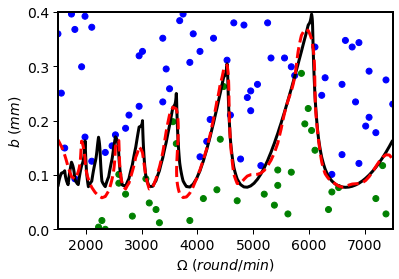

In [6]:
from scipy.stats import norm
import matplotlib.pyplot as plt
# plot setting
py.rcParams['xtick.labelsize'] = 16
py.rcParams['ytick.labelsize'] = 16
py.rcParams['font.size'] = 16
#font = {'family':'serif','size':16}
font = {'family':'serif','size':16, 'serif': ['computer modern roman'],'weight':'normal'}
py.rc('font',**font)
py.rcParams["font.weight"] = 'normal'
py.rcParams["axes.labelweight"] = 'normal'
py.rcParams['axes.linewidth'] = 2

n=100
num_reproduct=500
# range of the simulation
alist = np.linspace(1500, 7500, 100)
blist = np.linspace(0, 40e-2, 100)
grid_list=get_grid(alist, blist)

# range
X_min = np.array([1500, 0])
X_max = np.array([7500, 40e-2])
# design variable 
X1 = np.linspace(X_min[0], X_max[0], n)
X2 = np.linspace(X_min[1], X_max[1], n) 
# design variable grid 100 x 100
X = get_grid(X1, X2)


# initial training
X_train_ini, y_train_ini,y_var1 = get_X_train_ini(alist, blist, grid_list, rho, N = 100,stochastic=True,rho_std=rho_var)
y_train_ini_color = ['g' if i <= 0 else 'b' for i in y_train_ini]
# fit
gp = SK(basis_num = 4, cho = True, stochastic = True, add_noise = True)
gp.fit(X_train_ini, y_train_ini,ep=y_var1/num_reproduct, rangeX = [X_min, X_max])
y_pred_ini, y_var = gp.predict(X)

# true rho plot
# Set background color of the outer 
# area of the plt
py.figure(facecolor='white')
py.contour(alist, blist, rho_, levels = [0], colors = 'k', linewidths = 3)
py.contour(X1, X2, y_pred_ini.reshape((100,100)), levels = [0], colors = 'r', linewidths = 3)
py.scatter(X_train_ini[:,0], X_train_ini[:,1], c = y_train_ini_color)
#py.xlabel(r'$Ω$' + r' $(round/min)$', fontweight='bold')
#py.ylabel(r'$b$' + r' $(m)$', fontweight='light')
py.xlim([1500, 7500])
py.ylim([0, 40e-2])
py.grid(b=None)
ax = py.axes()
ax.grid(False)
ax.set_facecolor("white")
ax.set_xlabel(r'$Ω$' + r' $(round/min)$')
ax.set_ylabel(r'$b$' + r' $(mm)$')
ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")
py.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
py.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax.ticklabel_format(useOffset=False, style='plain')

In [7]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# save the initial 200 points to npy file
save('X_train_ini.npy', X_train_ini)
save('y_train_ini.npy', y_train_ini)
save('y_pred_ini.npy', y_pred_ini)
save('y_var1.npy', y_var1)

In [8]:
# FSSF
from sklearn.neighbors import NearestNeighbors
import sobol_seq as sq
import numpy as np
sample=sq.i4_sobol_generate(2,22000)

#N=2*N_max+1000*d 

def FSSF(S,N_max,K):
    def dl(l,n):
        nbrs = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(l)
        distances, indices = nbrs.kneighbors(l)
        return distances
    sf=[]



    def removed_points(D,L):    
        small_row_index=[]
        if len(L)>1:
            best=min(D[:,1]) 
        else:
            ps=L[0] #high dimension cannot directly choose the whole one
            return D,L,ps
        
        for j in range(len(D)):
            if D[j][1]==best:
                small_row_index.append(j)

        ite=1
        while len(small_row_index)>1:
            ite+=1
            if ite==K:
                break
            new_index=[]
            sec_best=min(D[small_row_index,ite])

            for i in small_row_index:
                if D[i][ite]==sec_best:
                    new_index.append(i)
            small_row_index=new_index


        D_del = np.delete(D, small_row_index[0], 0)
        ps=L[small_row_index[0]]
 
        L=np.delete(L, small_row_index[0],0)#delete along row direction
        
        return D_del,L,ps
    
    D=dl(S,K)
    final_design_points,final_list,p=removed_points(D,S)
    
    n_list=len(final_list)
    count=1
    
    for i in range(n_list):
        if len(final_list)>N_max:

            D=dl(final_list,K)
            final_design_points,final_list,p=removed_points(D,final_list)

        else:
            
            if len(final_list)>K:
                D=dl(final_list,K)
                final_design_points,final_list,p=removed_points(D,final_list)
                count=1
                sf.append(p)
            else:
                final_design_points,final_list,p=removed_points(final_design_points,final_list)
                count+=1
                sf.append(p)

    sf=np.array(sf)

    return sf
fssf=FSSF(sample,10000,20)
save('FSSF.npy', fssf)

In [10]:
# noted that it may not get the decent result at 10 slice. You can try more slices to get a good result

import numpy as np
import pylab as py
import scipy.stats
import pylab as py
import matplotlib.pyplot as plt
from scipy.stats import norm

fssf = np.load('./FSSF.npy')
sfssf=[fssf[1000*i:1000*(i+1)] for i in range(10)]
y_var2=y_var1

#%% Sequential Design simulation
target = 0 # find boundary 0
X_train_ = X_train_ini.copy()
y_train_ = y_train_ini.copy()
X_added = []
y_added = []

for i in range(len(sfssf)):
    print(f'At iteration {i+1}')
    slhd_i = (X_max-X_min) * np.array(sfssf[i]) + X_min
    X_arg = np.array([np.argmin( np.linalg.norm(i - X, axis = 1, keepdims = True)) for i in slhd_i])
    X_ = np.unique(X[X_arg], axis = 0)

    y_, var_ = gp.predict(X_)
    std_ = np.sqrt(var_)

    I_ = np.array([EI(jj[0], jj[1], target, y_train_) for jj in zip(y_, std_)])

    ind_ = I_.flatten().argsort()[-10:] # select 10 largest
    X_train_sq = X_[ind_]
    y_train_sq_list=[]
    for ele in range(num_reproduct):
        y_train_sq = np.array([tfem(i[0], 0.001*i[1], ksi_list[ele], w, wn_list[ele], k_list[ele]) for i in X_train_sq])# the TFEM use m for depth of cut but here we change the unit to mm so need to change it back
        y_train_sq_list.append(y_train_sq)
    y_train_sq_mean=np.mean(y_train_sq_list, axis=0) 
    y_train_sq_std=np.var(y_train_sq_list, axis=0)
    y_train_sq_c = ['g' if i <= 0 else 'b' for i in y_train_sq_mean]


    X_train_ = np.vstack([X_train_, X_train_sq])
    y_train_ = np.concatenate([y_train_, y_train_sq_mean])
    y_var2=np.concatenate([y_var2, y_train_sq_std])
    X_added.append(X_train_sq)
    y_added += y_train_sq_c

    gp.fit(X_train_, y_train_,ep=y_var2/num_reproduct, rangeX = [X_min, X_max])
    y_pred_, _ = gp.predict(X)

    X_added_ = np.vstack(X_added)    

    save(f'FSSF{i+1}_y_pred_.npy', y_pred_)
    save(f'FSSF{i+1}_variance.npy', _)
    save(f'FSSF{i+1}_X_added_.npy', X_added_)
    save(f'FSSF{i+1}_y_color_.npy', y_added)
    save(f'FSSF{i+1}_y_var2.npy', y_var2)